In [3]:
## Hotel Booking Cancellation analysis
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r"C:\Users\91983\Downloads\hotel_bookings 2.csv")
dff=df.drop(["company","agent"],axis=1)
dff["country"].fillna(0,inplace=True)
children = dff.children.mean()
dff["children"].fillna(children,inplace=True)
dff.isnull().sum()


#Now Here we can see that there are no null values in any column.

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

The overall cancellation rates in hotels: 
 is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


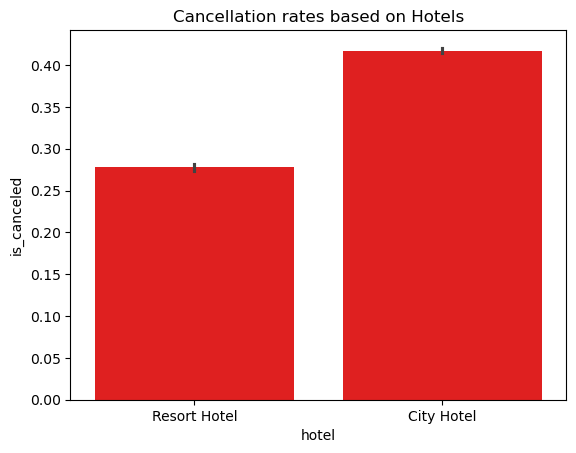

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings("ignore")
pt.title("Cancellation rates based on Hotels")
sb.barplot(x='hotel',y='is_canceled',data=dff,color="r")
cancelled_percentage = df['is_canceled'].value_counts(normalize=True)
print("The overall cancellation rates in hotels: \n",cancelled_percentage)

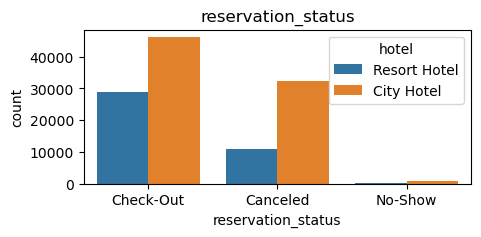

In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
pt.figure(figsize=(5,2))
sb.countplot(x="reservation_status",data=dff,hue="hotel")
pt.title("reservation_status")
pt.show()

In [6]:
#cancellation rates in city hotel
city_hotel = dff.loc[(dff["hotel"]=="City Hotel")]
a = city_hotel["is_canceled"].value_counts(normalize=True)
print("(city hotel cancellatios)",a*100)

resort_hotel = dff.loc[(dff["hotel"]=="Resort Hotel")]
b = resort_hotel["is_canceled"].value_counts(normalize=True)
print("(resort hotel cancellations)",b*100)


(city hotel cancellatios) is_canceled
0    58.273037
1    41.726963
Name: proportion, dtype: float64
(resort hotel cancellations) is_canceled
0    72.236645
1    27.763355
Name: proportion, dtype: float64


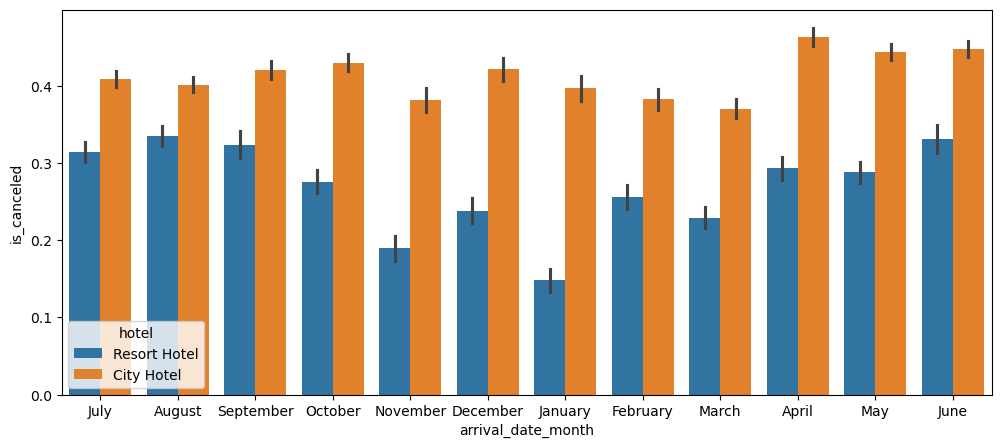

In [7]:
pt.figure(figsize=(12,5))
sb.barplot(x="arrival_date_month",y="is_canceled",data=dff,hue="hotel",legend=True)
pt.show()

In [8]:
#By the above graph we can see that the minimum cancellations is in January for Resort Hotel and in March for City Hotel.
#The maximum cancellations for Resort hotel is done in August and that for City hotel is in April.


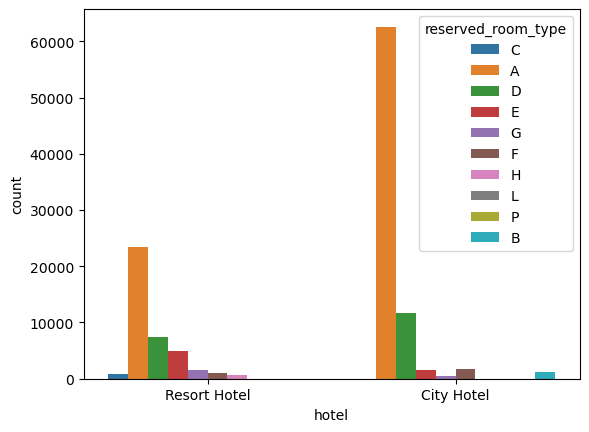

In [9]:
sb.countplot(x="hotel",data=dff,hue="reserved_room_type")
pt.show()

In [10]:
#From the above representation we can see that room_type is not the major factor in the cancellations of hotel bookings

In [11]:
#checking the cancellation on the basis of countries

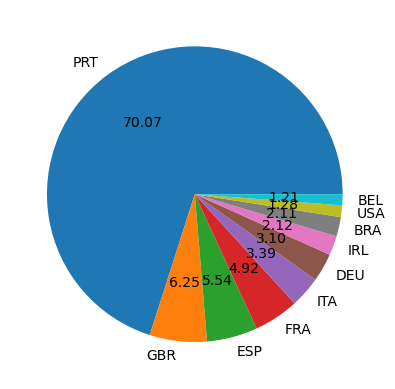

In [12]:
country_canceled = df.loc[(df["is_canceled"]==1)]["country"]
canceled_country_rates=country_canceled.value_counts()[:10]
pt.pie(canceled_country_rates,autopct = "%.2f",labels = canceled_country_rates.index)
pt.show()

In [13]:
#the maximum cancellation is from PRT 

In [14]:
print(dff)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
x = dff.drop(columns="is_canceled",axis=1)
y = dff["is_canceled"]
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64


In [62]:
print(dff.shape)
print("*********************")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y, random_state=2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(119390, 30)
*********************
(95512, 29) (23878, 29) (95512,) (23878,)
